In [120]:
# imports 

import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from sklearn.metrics import confusion_matrix
from numpy import linalg as la 
import scipy
import timeit

# validate that imports and dependencies are setup correctly 
print("Imports successful ...")

Imports successful ...


## Problem 1 

### Part a 

In [3]:

# load the mnst characer dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Part b and c

Text(0.5, 1.0, 'Test Data 3')

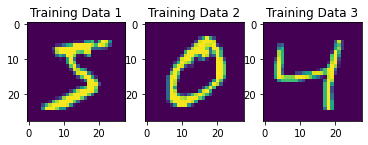

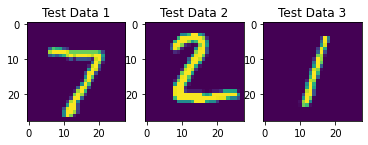

In [5]:
# create a plotting object and show examples
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(x_train[0,:,:])
ax1.set_title('Training Data 1')

ax2.imshow(x_train[1, :, :])
ax2.set_title('Training Data 2')

ax3.imshow(x_train[2, :, :])
ax3.set_title('Training Data 3')

f, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(x_test[0,:,:])
ax1.set_title('Test Data 1')

ax2.imshow(x_test[1,:,:])
ax2.set_title('Test Data 2')

ax3.imshow(x_test[2,:,:])
ax3.set_title('Test Data 3')

In [5]:
y_test[2500] 

2

In [6]:
784/16

49.0

### Part d

In [6]:
# construct a machine learning model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(784, activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.2), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [7]:
#compile model
model.compile(optimizer="SGD", loss = 'mean_squared_error', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 2s 1ms/step - loss: 27.3177 - accuracy: 0.0911


In [9]:
test_predictions = model.predict(x_test)

### Part e 

In [10]:
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))

In [11]:
confusion

array([[102, 137, 117, 132,  89,  79,  64,  90,  86,  84],
       [117,  92,  93, 152, 113,  97, 135,  94, 110, 132],
       [105,  88, 111,  86, 102, 104, 135, 127,  71, 103],
       [103, 102,  92, 121, 124, 112,  72,  83, 103,  98],
       [141,  60, 122, 143, 101,  82,  94,  73,  98,  68],
       [ 92,  78, 103,  77, 101,  98,  92,  60,  93,  98],
       [120,  72, 103,  86, 103, 114,  58,  99,  87, 116],
       [ 77, 135, 130, 121,  70,  74, 107, 130,  87,  97],
       [ 89, 105,  95,  94, 101,  81, 107,  85, 104, 113],
       [ 77, 133, 133,  77,  75, 106,  78, 150,  86,  94]], dtype=int64)

In [12]:
model.compile(optimizer="SGD", loss = 'mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 3s 2ms/step - loss: 27.2980 - accuracy: 0.0983 - val_loss: 27.4643 - val_accuracy: 0.1103
Epoch 2/3
1688/1688 [==============================] - 2s 1ms/step - loss: 27.2970 - accuracy: 0.1022 - val_loss: 27.4636 - val_accuracy: 0.1092
Epoch 3/3
1688/1688 [==============================] - 2s 1ms/step - loss: 27.2962 - accuracy: 0.1013 - val_loss: 27.4631 - val_accuracy: 0.1115


In [13]:
test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

array([[113, 104,  88, 100,  77, 134,  96,  96,  89,  83],
       [115, 112,  86, 165, 103, 109, 122,  90, 130, 103],
       [102, 116, 134,  79,  99, 103, 109, 116,  86,  88],
       [113, 106,  89, 130,  99,  99,  66,  95, 110, 103],
       [137,  91, 104,  92,  83, 106,  98,  99, 100,  72],
       [ 83,  98, 105,  67,  93, 101,  93,  82,  96,  74],
       [ 93,  71,  87, 106, 107, 104,  95, 101, 100,  94],
       [ 95, 106,  95, 124,  70, 106, 117, 106, 109, 100],
       [107, 101,  95, 101, 100,  82, 106, 103, 104,  75],
       [ 98, 138, 120, 103,  84, 109,  74, 124,  84,  75]], dtype=int64)

In [14]:
# use a different loss function than mean squared error
model.compile(optimizer="SGD", loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=1)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.5337 - accuracy: 0.8364


In [16]:
test_predictions = model.predict(x_test)
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

array([[ 942,    0,    5,    4,    1,   12,   10,    1,    5,    0],
       [   0, 1107,    3,    4,    1,    2,    5,    2,   11,    0],
       [   9,    1,  903,   34,   19,    2,   22,   17,   25,    0],
       [   3,    0,   14,  927,    2,   24,    4,   15,   19,    2],
       [   1,    1,    3,    0,  932,    2,   20,    4,    7,   12],
       [  10,    3,    3,   51,    8,  781,   14,    4,   16,    2],
       [  16,    3,    7,    4,    8,   21,  894,    1,    4,    0],
       [   4,   12,   27,    5,   13,    2,    1,  954,    2,    8],
       [   4,    5,    9,   57,   15,   46,   10,   16,  811,    1],
       [   5,    5,    7,   18,  147,   13,    2,   84,   17,  711]],
      dtype=int64)

In [17]:
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_split=0.1)
confusion = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))
confusion

Epoch 1/3
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3888 - accuracy: 0.8803 - val_loss: 0.2575 - val_accuracy: 0.9265
Epoch 2/3
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3542 - accuracy: 0.8911 - val_loss: 0.2308 - val_accuracy: 0.9337
Epoch 3/3
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3426 - accuracy: 0.8964 - val_loss: 0.2285 - val_accuracy: 0.9362


array([[ 942,    0,    5,    4,    1,   12,   10,    1,    5,    0],
       [   0, 1107,    3,    4,    1,    2,    5,    2,   11,    0],
       [   9,    1,  903,   34,   19,    2,   22,   17,   25,    0],
       [   3,    0,   14,  927,    2,   24,    4,   15,   19,    2],
       [   1,    1,    3,    0,  932,    2,   20,    4,    7,   12],
       [  10,    3,    3,   51,    8,  781,   14,    4,   16,    2],
       [  16,    3,    7,    4,    8,   21,  894,    1,    4,    0],
       [   4,   12,   27,    5,   13,    2,    1,  954,    2,    8],
       [   4,    5,    9,   57,   15,   46,   10,   16,  811,    1],
       [   5,    5,    7,   18,  147,   13,    2,   84,   17,  711]],
      dtype=int64)

## Homework Question 2

### Part a 

In [26]:
#x = np.random.randint(-5, 5, (10, 2))
x = np.array([
    [-4.0,-4.0],
    [1.0, 0.0],
    [2.0, 3.0],
    [-1.0, 2.0],
    [-2.0, -2.0],
    [-4.0, -1.0],
    [-2.0, -1.0],
    [-5.0, -5.0],
    [-2.0, -3.0],
    [4.0, 4.0]
])

In [27]:
c1 = x[0,:]
c2 = x[1,:]
c3 = x[2,:]

dist1 = c1 - x
dist2 = c2 - x
dist3 = c3 - x 

In [28]:
k1 = la.norm(dist1, axis=1)
k2 = la.norm(dist2, axis=1)
k3 = la.norm(dist3, axis=1)

### Part b 

In [29]:
# minimize the distance for the clusters 
clusters = np.argmin([k1, k2, k3], axis=0)

clusters

array([0, 1, 2, 1, 0, 0, 1, 0, 0, 2], dtype=int64)

In [30]:
C1 = x[clusters==0]
C2 = x[clusters==1]
C3 = x[clusters==2]
centroids = np.array([c1, c2, c3])

In [32]:
def sq_error(points, center):
    return np.sum(la.norm(points-center))


sq_error1 = sq_error(C1, c1)
sq_error2 = sq_error(C2, c2)
sq_error3 = sq_error(C3, c3)

print('Squared Error of cluster 1')
print(sq_error1)

print('Squared Error of cluster 2')
print(sq_error2)

print('Squared Error of cluster 3')
print(sq_error3)

Squared Error of cluster 1
4.898979485566356
Squared Error of cluster 2
4.242640687119285
Squared Error of cluster 3
2.23606797749979


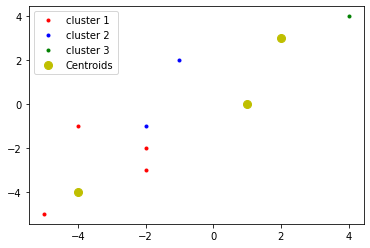

In [33]:
# display the clusters 

#clusters 
plt.plot(C1[:,0],C1[:,1],'r.', label='cluster 1')
plt.plot(C2[:,0],C2[:,1],'b.', label='cluster 2')
plt.plot(C3[:,0],C3[:,1],'g.', label='cluster 3')

# centers
plt.plot(centroids[:,0], centroids[:,1], 'yo', markersize = 8, label='Centroids')
plt.legend(loc='best')
plt.show()

### Part f

Squared Error of cluster 1
Squared Error of cluster 2
Squared Error of cluster 3


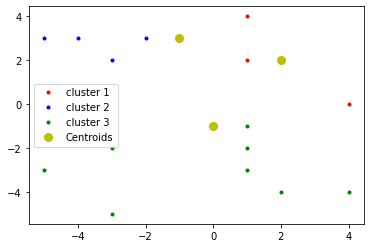

In [35]:
x_rand = np.random.randint(-5, 5, (20, 2))

c1 = x_rand[0,:]
c2 = x_rand[1,:]
c3 = x_rand[2,:]

dist1 = c1 - x_rand
dist2 = c2 - x_rand
dist3 = c3 - x_rand 

k1 = la.norm(dist1, axis=1)
k2 = la.norm(dist2, axis=1)
k3 = la.norm(dist3, axis=1)

clusters = np.argmin([k1, k2, k3], axis=0)

clusters

C1 = x_rand[clusters==0]
C2 = x_rand[clusters==1]
C3 = x_rand[clusters==2]
centroids = np.array([c1, c2, c3])

sq_error1 = sq_error(C1, c1)
sq_error2 = sq_error(C2, c2)
sq_error3 = sq_error(C3, c3)

print('Squared Error of cluster 1')
sq_error1

print('Squared Error of cluster 2')
sq_error2

print('Squared Error of cluster 3')
sq_error3

# display the clusters 

#clusters 
plt.plot(C1[:,0],C1[:,1],'r.', label='cluster 1')
plt.plot(C2[:,0],C2[:,1],'b.', label='cluster 2')
plt.plot(C3[:,0],C3[:,1],'g.', label='cluster 3')

# centers
plt.plot(centroids[:,0], centroids[:,1], 'yo', markersize = 8, label='Centroids')
plt.legend(loc='best')
plt.show()

## Homework Question 3

### Part a 

In [53]:
x11 = np.random.standard_normal((200, 1)) * 1.2 + np.ones((200,1))-2
x12 = np.random.standard_normal((200,1))*0.8 + np.ones((200,1))-2
x1 = np.concatenate((x11, x12), axis=1)

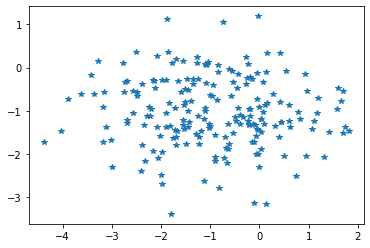

In [54]:
plt.plot(x1[:, 0], x1[:, 1], '*')

In [55]:
x21 = np.random.standard_normal((200, 1)) * 0.9 + np.ones((200,1))
x22 = np.random.standard_normal((200,1))*0.7 + np.ones((200,1))
x2 = np.concatenate((x21, x22), axis=1)


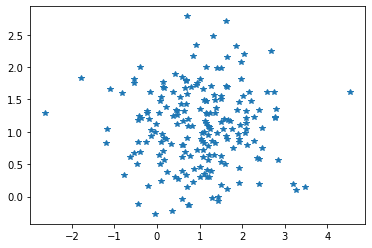

In [56]:
plt.plot(x2[:, 0], x2[:, 1], '*')

In [57]:
x31 = np.random.standard_normal((200,1))*0.8+np.ones((200,1))+3
x32 = np.random.standard_normal((200,1))*0.5+np.ones((200,1))+4
x3 = np.concatenate((x31,x32), axis=1)

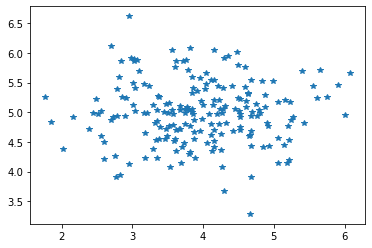

In [58]:
plt.plot(x3[:, 0], x3[:, 1], '*')

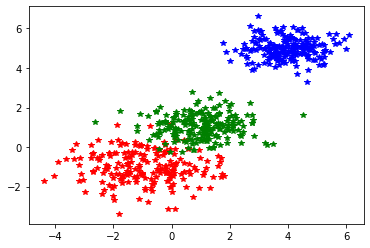

In [59]:
X = np.concatenate((x1, x2, x3), axis=0)

plt.plot(X[0:200,0], X[0:200, 1], 'r*')
plt.plot(X[200:400,0], X[200:400,1], 'g*')
plt.plot(X[400:600,0], X[400:600, 1], 'b*')

### Part b and c

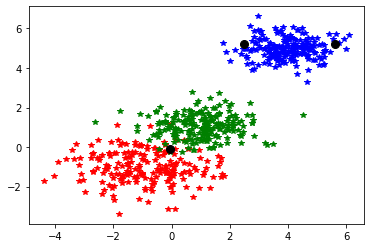

In [74]:
from scipy.spatial.distance import cdist

k = 3
x=X
no_of_iterations = 5

idx = np.sort(np.random.choice(len(x),k,replace=False))
centroids = x[idx,:]

k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')
points = np.array([np.argmin(i) for i in k_by_1_corr_fn])

idx = np.sort(np.random.choice(len(x),k,replace=False))
centroids = x[idx,:]
points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
old_cent = centroids

plt.plot(X[0:200,0],X[0:200,1],'r*')
plt.plot(X[200:400,0], X[200:400,1],'g*')
plt.plot(X[400:600,0],X[400:600,1],'b*')
plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')

err_thresh = 0.01

### Part d

Prior estimation error:  9.225497640703704
Iteration Number:  1


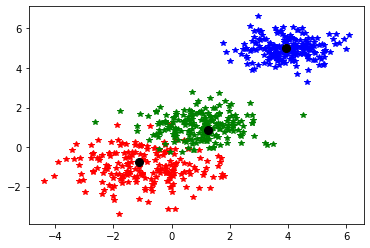

Prior estimation error:  0.31832647573570194
Iteration Number:  2


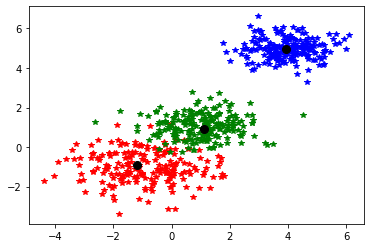

Prior estimation error:  0.08329998594688437
Iteration Number:  3


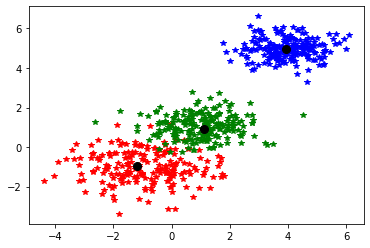

Prior estimation error:  0.0
Required prior estimation error reached.


In [75]:
for i in range(no_of_iterations):
    
    centroids = []
    for idx in range(k):
        temp_cent = x[points==idx].mean(axis=0)
        centroids.append(temp_cent)
        
    centroids = np.vstack(centroids)
    prior_estimation_error = np.sum(old_cent - centroids)
    print("Prior estimation error: ",prior_estimation_error)
    if np.abs(prior_estimation_error) < 0.01:
        print("Required prior estimation error reached.")
        break
        
    print("Iteration Number: ", i+1)
    
    old_cent = centroids
    k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')
    points = np.array([np.argmin(i) for i in k_by_1_corr_fn])

    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(X[0:200,0], X[0:200, 1], 'r*')
    ax.plot(X[200:400,0], X[200:400,1], 'g*')
    ax.plot(X[400:600,0], X[400:600, 1], 'b*')

    ax.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')
    plt.show()

## Homework Question 4

In [76]:
def generateSamples(N, variance=100):
    import random
    X = np.matrix(range(N)).T + 1
    Y = np.matrix([random.random() * variance + i for i in range(len(X))]).T
    return X, Y

In [77]:
def fitModel_gradient(x,y, eta, maxIteration):
    N = len(x)
    w = np.zeros((x.shape[1],1))
    eta = 0.0001      #learning rate
    error = x * w - y
    old_gradient = x.T * error/N
    w = w - eta * old_gradient
    for i in range(maxIteration):
        error = x * w - y
        gradient = x.T * error/N
        w = w - eta *gradient
        prior_estimation_error = np.abs((old_gradient - gradient)[0])
        old_gradient = gradient

    print('Prior estimation error: ', prior_estimation_error)
    return w

In [78]:
def plotModel(x, y, w):
    fig = plt.figure()
    ax = fig.add_subplots(111)
    ax.plot(x[:,1], y, "x")
    ax.plot(x[:,1], x*w, "r--")
    plt.show()

In [79]:
def test(N, variance, maxIter, eta, modelFunction):
    X,Y = generateSamples(N,variance)
    X = np.hstack([np.matrix(np.ones(len(X))).T, X])
    w = modelFunction(X,Y, eta, maxIter)
    plotModel(X,Y,w)

### Part a 

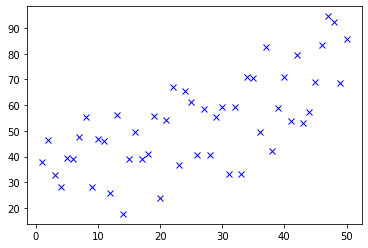

In [80]:
import random

fig = plt.figure()
ax = fig.add_subplot(111)

N1 = 50 
sigma1 = 50
X, Y = generateSamples(N1,sigma1)
ax.plot(X,Y, "bx")


### Part b / c

Iterations: 10000
Prior estimation error:  [[8.54217264e-05]]


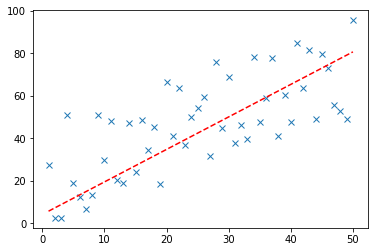

In [81]:
eta = 0.00001
maxIter = (10, 100, 1000)

print("Iterations: 10000")
test(N1, sigma1, 10000, eta, fitModel_gradient)

### Part d

N:  100 Sigma:  100
Iterations:  10000
Prior estimation error:  [[0.00027703]]


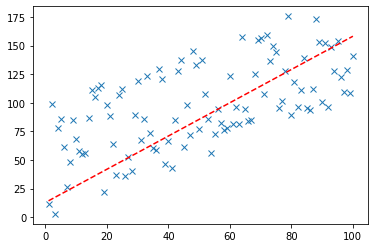

N:  200 Sigma:  50
Iterations:  10000
Prior estimation error:  [[0.00012471]]


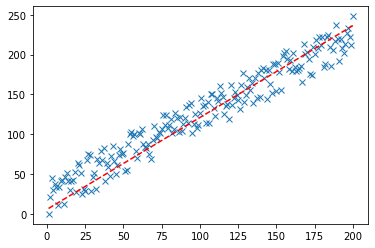

N:  500 Sigma:  300
Iterations:  10000
Prior estimation error:  [[nan]]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1135100589.py:11: RuntimeWarning: invalid value encountered in subtract
  w = w - eta *gradient


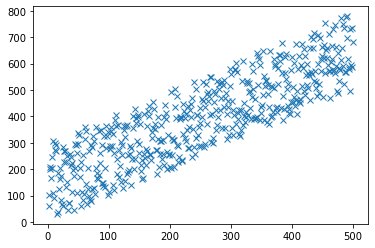

In [84]:
N = [100, 200, 500]
sigma = [100, 50, 300]

for n, sig in zip(N, sigma): 
    print("N: ", n, "Sigma: ", sig)
    
    print("Iterations: ", 10000)
    test(n,sig, 10000, eta, fitModel_gradient)
    

### Part e/f

Learning Rate:  1e-05
Iterations:  10
Prior estimation error:  [[1.55445606]]


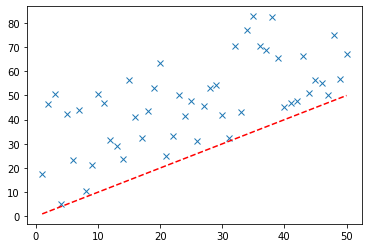

Iterations:  100
Prior estimation error:  [[0.00069139]]


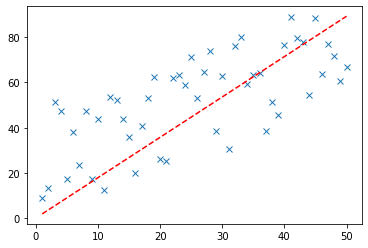

Iterations:  1000
Prior estimation error:  [[0.00012362]]


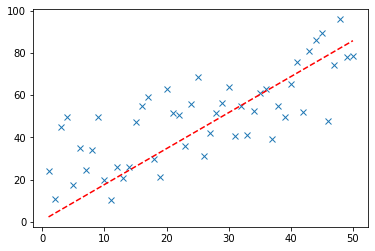

Iterations:  10000
Prior estimation error:  [[0.00011515]]


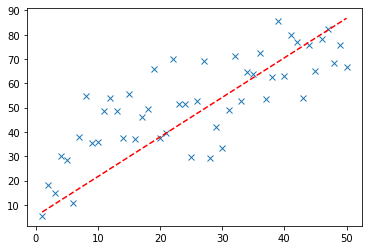

Learning Rate:  0.0001
Iterations:  10
Prior estimation error:  [[1.65143789]]


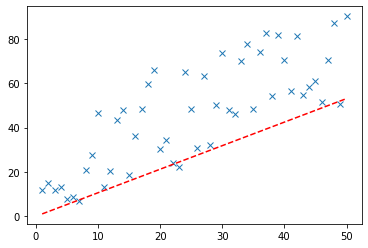

Iterations:  100
Prior estimation error:  [[0.00065623]]


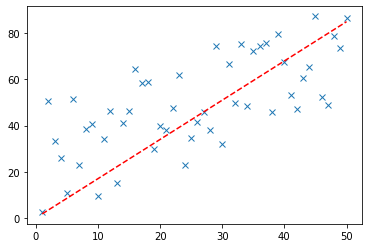

Iterations:  1000
Prior estimation error:  [[0.00014107]]


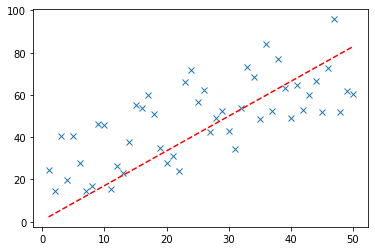

Iterations:  10000
Prior estimation error:  [[0.00010555]]


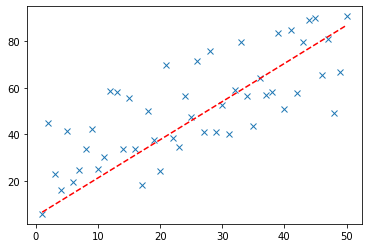

Learning Rate:  0.001
Iterations:  10
Prior estimation error:  [[1.71150631]]


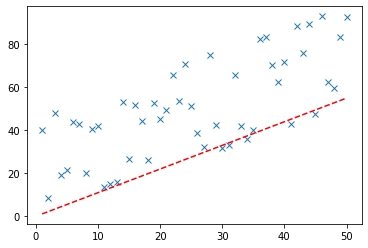

Iterations:  100
Prior estimation error:  [[0.00068212]]


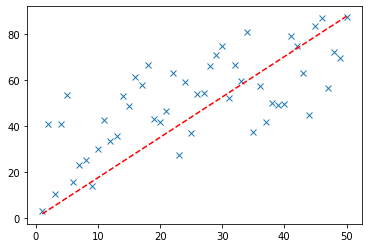

Iterations:  1000
Prior estimation error:  [[0.00016624]]


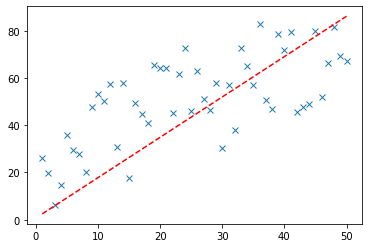

Iterations:  10000
Prior estimation error:  [[0.00010102]]


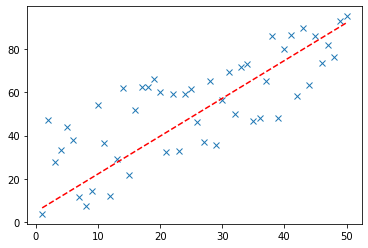

In [87]:
eta = [0.00001, 0.0001, 0.001]
N = 50 
sigma = 50

for e in eta:
    print("Learning Rate: ", e)
    
    print("Iterations: ", maxIter[0])
    test(N,sigma, maxIter[0], e, fitModel_gradient)
    
    print("Iterations: ", maxIter[1])
    test(N,sigma, maxIter[1], e, fitModel_gradient)
    
    print("Iterations: ", maxIter[2])
    test(N,sigma, maxIter[2], e, fitModel_gradient)
    
    print("Iterations: ", 10000)
    test(N, sigma, 10000,e , fitModel_gradient)

By increasing the learning rate, under the presumption of 50 points with a variance of 50, the error after 10,000 iterations decreases.  Also, the rate at which the error decreases seems to increase with a higher learning rate.

## Need to know for midterm and final:
Non-negative matrix factorization (NMF) is another dimension reduction method that unlike PCA, 

## Homework Question 5

In [95]:
# define functions for the primary function and its gradient 

import scipy.optimize as sopt
from mpl_toolkits.mplot3d import Axes3D

# surface equation
def f(x):
    return 0.1*x[0]**3 + 0.5*x[1]**2

# gradient of surface 
def df(x):
    return np.array([0.3*x[0], 1*x[1]])

Estimation Error:  [-0.46989589 -1.87958358]
X1:  1.030104106058359  Y1:  -0.07958357576656461


C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


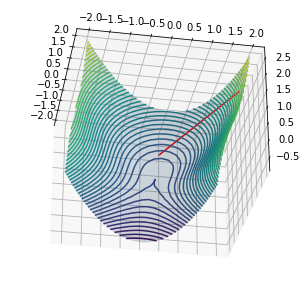

Estimation Error:  [-0.72636423  0.18705767]
X2:  0.3037398791580509  Y2:  0.10747409521919318


C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


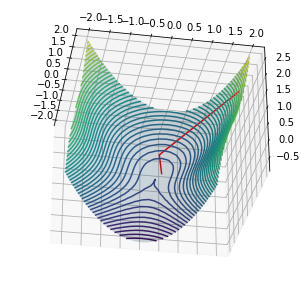

Estimation Error:  [-0.10006784 -0.11802533]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


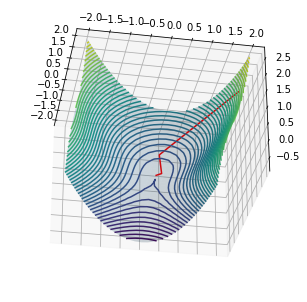

C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Estimation Error:  [-0.1243701   0.02147666]


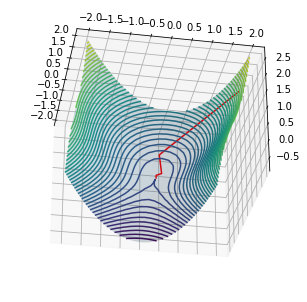

Estimation Error:  [-0.02759397 -0.01267206]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


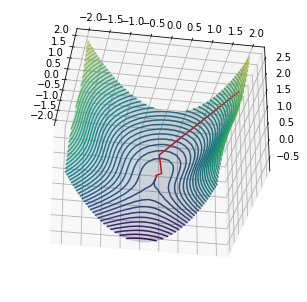

Estimation Error:  [-0.02838463  0.00319601]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


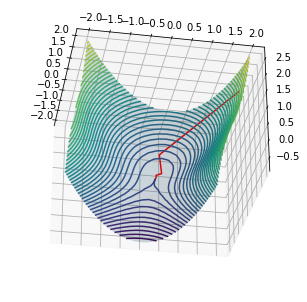

C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Estimation Error:  [-0.0085276  -0.00176642]


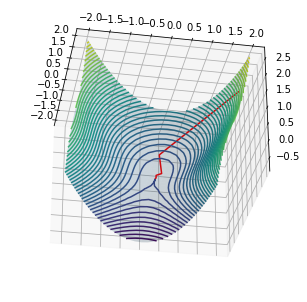

C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Estimation Error:  [-0.00753693  0.00053835]


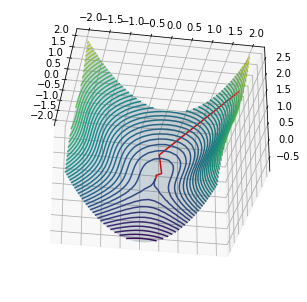

Estimation Error:  [-0.00276442 -0.00028093]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


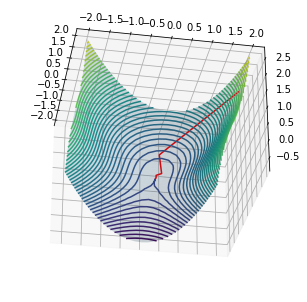

Estimation Error:  [-2.17408623e-03  9.61506975e-05]


C:\Users\ryanm\AppData\Local\Temp/ipykernel_7368/1319937042.py:35: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


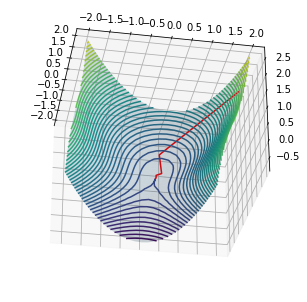

Iterations required for convergence:  10


In [98]:
guesses = [np.array([1.5, 1.8])]

epsilon = 0.0001

err = np.array([np.inf, np.inf])

n = 0
maxIters = 10000

#for i in range(3):
while np.abs(err[0]) > epsilon and np.abs(err[1])>epsilon and n < maxIters:

    x = guesses[-1]
    s = -df(x)
    
    def f1d(alpha):
        return f(x + alpha*s)
    
    alpha_opt = sopt.golden(f1d)
    next_guess = x + alpha_opt * s
    guesses.append(next_guess)
    
    err = guesses[-1] - guesses[-2]
    
    print("Estimation Error: ", err)
    
    n += 1
    
    if n == 1:
        print("X1: ", next_guess[0], " Y1: ", next_guess[1])
    if n == 2:
        print("X2: ", next_guess[0], " Y2: ", next_guess[1])
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.azim = -10
    ax.dist = 10
    ax.elev = -30
    xmesh, ymesh = np.mgrid[-2:2:25j,-2:2:25j]
    fmesh = f(np.array([xmesh, ymesh]))
    ax.plot_surface(xmesh, ymesh, fmesh, alpha=0.2)
    ax.contour(xmesh, ymesh, fmesh, 50)
    it_array = np.array(guesses)
    ax.plot(it_array.T[0], it_array.T[1], f(it_array.T), "r-")
    plt.show()
    
print("Iterations required for convergence: ", n)

## Homework Question 6 : PCA

### Parts a-c

In [99]:
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

In [121]:
# the x train is the actual unidentified image matrix data 
data = x_train[0:15000, :, :]
# the y label is the truth data, or the answer key of what the digit should be 
labels = y_train[0:15000]
data = data.reshape(len(data), -1)
data.shape[1]

784

In [122]:
# standardizes data by normalizing between 0 and 1 
standardized_data = StandardScaler().fit_transform(data)

In [123]:
## Implementation of the PCA algorithm 
sample_data = standardized_data

t1 = timeit.timeit()
covar_matrix = np.matmul(sample_data.T, sample_data)

# eigen value with the highest variation gives the best representation of the data
values, vectors = eigh(covar_matrix, eigvals=(data.shape[1] -2, data.shape[1] -1))
vectors = vectors.T
new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates = np.vstack((new_coordinates, labels)).T

t2 = timeit.timeit()

pca_time = t2 - t1

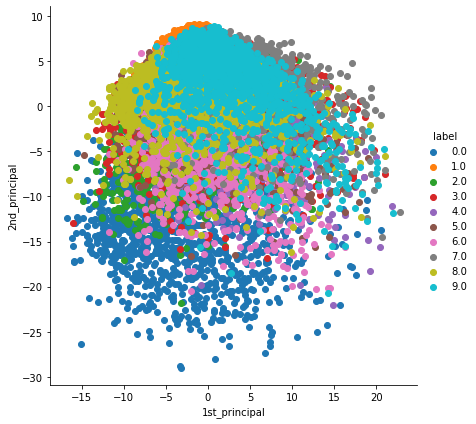

In [124]:
from sklearn import decomposition
import seaborn as sn
import pandas as pd 

pca_df = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### Part d 

This may not be fully sufficient because there is not enough variation between digits towards the top clusters, namely digits that are not 9 or 6

## Homework Question 7

### Parts a - b

In [125]:
data = x_test[0:15000,:,:]
labels = y_test[0:15000]
data = data.reshape(len(data),-1)

t1 = timeit.timeit()
standardized_data = StandardScaler().fit_transform(data)
sample_data = standardized_data
ica = decomposition.FastICA(n_components=2, fun='logcosh')
ica_data = ica.fit_transform(sample_data)

t2 = timeit.timeit()

ica_time = t2-t1

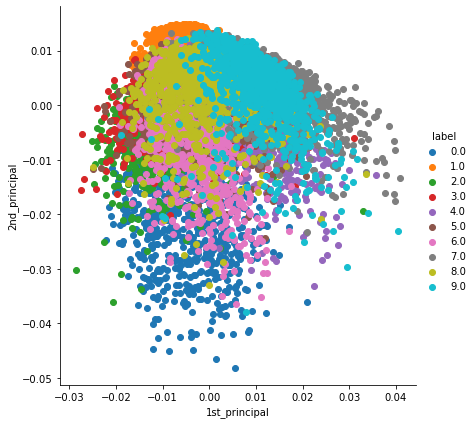

In [126]:
ica_data = np.vstack((ica_data.T, labels)).T
ica_df = pd.DataFrame(data=ica_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(ica_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### Part c 

In [127]:
print("PCA time elapsed: ", pca_time, " ICA time elapsed: ", ica_time)

PCA time elapsed:  0.004496000066865236  ICA time elapsed:  0.0023056999780237675


### Part d and e

d. There appears to be significantly better separation using ica instead of pca in this context, based on visual inspection of the plots

e. Two components would give better results for ica in this example.  However, it depends on the accuracy requirements.  Compared to the pca analysis, ica will have a more accurate confusion matrix.  However, there still is not full separation between all of the digits, indicating that there will be some degree of prediction error.  So it may not be fully sufficient to use 2 components, and more components could benefit the model, assuming it does not impose siginficant computational burden.

## Question 8

### Part a 

In [162]:
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import pandas as pd
from sklearn import decomposition
import seaborn as sn

# calculate a pca for the training and testing data 

# load the mnst characer dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def pca(image_data, labels, n_comps):
    data = image_data.reshape(len(image_data), -1)
    data_size = data.shape[1]
    
    standardized_data = StandardScaler().fit_transform(data)
    sample_data = standardized_data
    covar_matrix = np.matmul(sample_data.T, sample_data)
    eig_idx = [i for i in range(data_size-n_comps, data_size)]
    values, vectors = eigh(covar_matrix, eigvals=eig_idx)
    
    #values, vectors = eigh(covar_matrix)
    vectors = vectors.T
    
    new_coordinates = np.matmul(vectors, sample_data.T)
    new_coordinates = np.vstack((new_coordinates, labels)).T
    
    return new_coordinates

def plot_pca(pca_data):
    pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
    sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
    plt.show()


PCA Analysis
Training Data Plot using PCA using  2  components


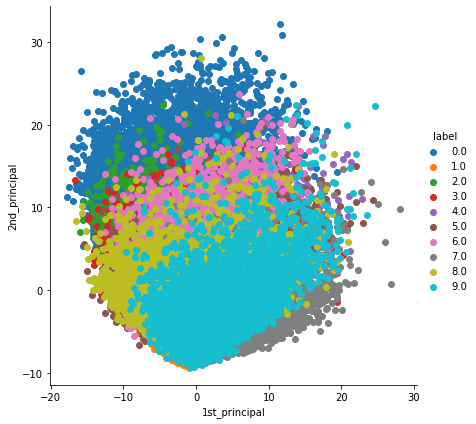

Test Data Plot using PCA using  2  components


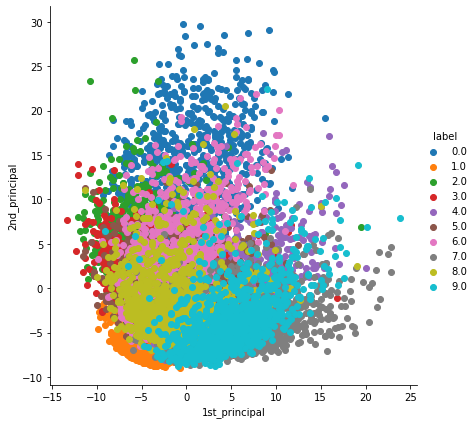

In [163]:
print("PCA Analysis")

data_train = x_train.reshape(len(x_train), -1)
data_test = x_test.reshape(len(x_test), -1)

labels_train = y_train
labels_test = y_test

n_comps = 2 
#n_comps = 10

image_size = data_train.shape[1]

pca_train = pca(data_train, labels_train, n_comps)
pca_test = pca(data_test, labels_test, n_comps)

print("Training Data Plot using PCA using ", n_comps, " components")
plot_pca(pca_train)

print("Test Data Plot using PCA using ", n_comps, " components")
plot_pca(pca_test)

In [164]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(image_size,activation=tf.nn.tanh),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

model.compile(optimizer="SGD", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


### Part b 

In [165]:
model.fit(pca_train, labels_train, epochs=3)
test_predictions_pca = model.predict(pca_test)
confusion = confusion_matrix(labels_test, np.argmax(test_predictions_pca, axis=1))
confusion

Epoch 1/3
1875/1875 [==============================] - 1s 453us/step - loss: 1.2537 - accuracy: 0.5365
Epoch 2/3
1875/1875 [==============================] - 1s 449us/step - loss: 0.8489 - accuracy: 0.7032
Epoch 3/3
1875/1875 [==============================] - 1s 450us/step - loss: 0.6856 - accuracy: 0.7778


array([[ 929,    7,   44,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1111,   24,    0,    0,    0,    0,    0,    0,    0],
       [   0,    7,  917,  108,    0,    0,    0,    0,    0,    0],
       [   0,    3,   52,  868,   87,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  955,   24,    3,    0,    0,    0],
       [   0,    0,    0,    1,  161,  477,  246,    7,    0,    0],
       [   0,    0,    0,    0,    0,   19,  918,   21,    0,    0],
       [   0,    0,    0,    0,    0,    0,    4,  910,  114,    0],
       [   0,    0,    0,    0,    0,    0,   24,   28,  844,   78],
       [   0,    0,    0,    0,    0,    0,    0,    4,   61,  944]],
      dtype=int64)

In [166]:
def ica(image_data, labels, n_comps):
    
    data = image_data.reshape(len(image_data),-1)
    standardized_data = StandardScaler().fit_transform(data)
    sample_data = standardized_data
    ica = decomposition.FastICA(n_components=n_comps, fun='logcosh')
    ica_data = ica.fit_transform(sample_data)
    ica_data = np.vstack((ica_data.T, labels)).T
    
    return ica_data


def plot_ica(ica_data):
    ica_df = pd.DataFrame(data=ica_data, columns=("1st_principal", "2nd_principal", "label"))
    sn.FacetGrid(ica_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
    plt.show()
    

ICA Analysis
Training Data Plot using PCA using  2  components


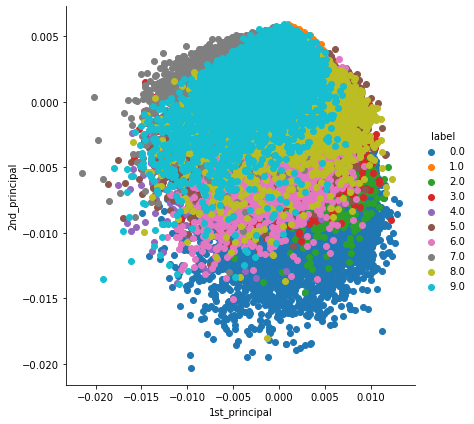

Testing Data Plot using ICA using  2  components


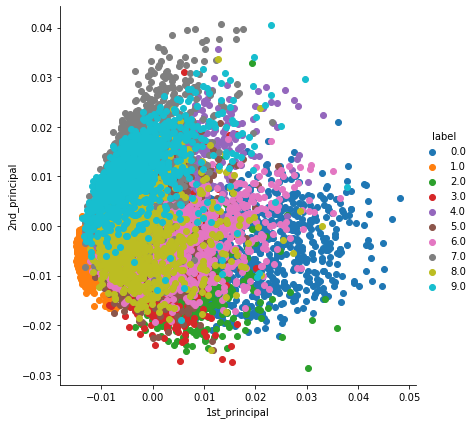

Epoch 1/3
1875/1875 [==============================] - 1s 461us/step - loss: 0.9071 - accuracy: 0.7477
Epoch 2/3
1875/1875 [==============================] - 1s 435us/step - loss: 0.6867 - accuracy: 0.8440
Epoch 3/3
1875/1875 [==============================] - 1s 432us/step - loss: 0.5892 - accuracy: 0.8890


array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1135,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1032,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1010,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,  982,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  892,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  958,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1028,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  974,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1009]],
      dtype=int64)

In [167]:
print("ICA Analysis")

n_comps = 2

ica_train = ica(data_train, labels_train, n_comps)
ica_test = ica(data_test, labels_test, n_comps)

print("Training Data Plot using PCA using ", n_comps, " components")
plot_ica(ica_train)

print("Testing Data Plot using ICA using ", n_comps, " components")
plot_ica(ica_test)

model.compile(optimizer="SGD", loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(ica_train, labels_train, epochs=3)

test_predictions_ica = model.predict(ica_test)
confusion = confusion_matrix(labels_test, np.argmax(test_predictions_ica, axis=1))
confusion

### Part f 

In [ ]:
def k_means_clustering(image_data, k=10, epsilon=0.01, max_iter=1000):
    idx = np.sort(np.random.choice(len(image_data), k ,replace=False))
    centroids = image_data[idx, :]
    k_by_1_corr_fn = cdist(image_data, centroids, 'seuclidean')
    
    points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
    old_cent = centroids
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    
    
    for i in range(max_iter):
        
        centroids = []
        for idx in range(k):
            temp_cent = image_data[points==idx].mean(axis=0)
            centroids.append(temp_cent)
                
        centroids = np.vstack(centroids)
        prior_estimation_error = np.sum(old_cent - centroids)
        print("Prior estimation error: ",prior_estimation_error)
        if np.abs(prior_estimation_error) < 0.01:
            print("Required prior estimation error reached.")
            break

        print("Iteration Number: ", i+1)

        old_cent = centroids
        k_by_1_corr_fn = cdist(x, centroids, 'seuclidean')
        points = np.array([np.argmin(i) for i in k_by_1_corr_fn])
        
        
    plt.plot(X[0:200,0],X[0:200,1],'r*')
    plt.plot(X[200:400,0], X[200:400,1],'g*')
    plt.plot(X[400:600,0],X[400:600,1],'b*')
    plt.plot(centroids[:,0], centroids[:,1], 'ko', markersize=8, label='centroids')
    plt.show()